## ETL BUSSINES

### IMPORTACION LIBRERIAS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargamos el dataset
df_business = pd.read_parquet(r"../../data/raw/yelp/business.parquet")

In [3]:
df_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,None,93101,34.426679,-119.711197,5.0,7,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,None,63123,38.551126,-90.335695,3.0,15,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Shipping Centers, Local Services, Notaries, Ma...","{'Friday': '8:0-18:30', 'Monday': '0:0-0:0', '..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,None,85711,32.223236,-110.880452,3.5,22,0,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Department Stores, Shopping, Fashion, Home & G...","{'Friday': '8:0-23:0', 'Monday': '8:0-22:0', '..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Friday': '7:0-21:0', 'Monday': '7:0-20:0', '..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'AcceptsInsurance': None, 'AgesAllowed': None...","Brewpubs, Breweries, Food","{'Friday': '12:0-22:0', 'Monday': None, 'Satur..."


In [4]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150343 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  attributes    136602 non-null  object 
 12  categories    150243 non-null  object 
 13  hours         127123 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 16.1+ MB


#### Se borran las columnas con datos innecesarios para el proyecto

In [5]:
columns_to_drop = ["postal_code", "is_open","latitude","longitude", "attributes","hours"]
df_limpio_bussines = df_business.drop(columns= columns_to_drop)

In [6]:
df_limpio_bussines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150343 non-null  object 
 5   stars         150346 non-null  float64
 6   review_count  150346 non-null  int64  
 7   categories    150243 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 9.2+ MB


In [7]:
df_limpio_bussines

,business_id,name,address,city,state,stars,review_count,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,None,5.0,7,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,None,3.0,15,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,None,3.5,22,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,4.5,13,"Brewpubs, Breweries, Food"
...,...,...,...,...,...,...,...,...
150341,IUQopTMmYQG-qRtBk-8QnA,Binh's Nails,3388 Gateway Blvd,Edmonton,IN,3.0,13,"Nail Salons, Beauty & Spas"
150342,c8GjPIOTGVmIemT7j5_SyQ,Wild Birds Unlimited,2813 Bransford Ave,Nashville,DE,4.0,5,"Pets, Nurseries & Gardening, Pet Stores, Hobby..."
150343,_QAMST-NrQobXduilWEqSw,Claire's Boutique,"6020 E 82nd St, Ste 46",Indianapolis,AB,3.5,8,"Shopping, Jewelry, Piercing, Toy Stores, Beaut..."
150344,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,AB,4.0,24,"Fitness/Exercise Equipment, Eyewear & Optician..."


#### se cambian los valores nulos de la columna "state" y se borran las filas que contengan datos nulos en la columna "categories"

In [11]:
null_counts = df_limpio_bussines.isnull().sum() 
print(null_counts)

business_id       0
name              0
address           0
city              0
state             3
latitude          0
longitude         0
stars             0
review_count      0
categories      103
dtype: int64


In [8]:
#los valores nulos encontrados en "state" se cambiaran por "desconocido"
df_limpio_bussines["state"].fillna("Desconocido", inplace= True)

#se borran las filas que contengan datos nulos en la columna "categories"
df_limpio_bussines.dropna(subset=["categories"], inplace=True)



C:\Users\ElRonconZzZ\AppData\Local\Temp\ipykernel_24804\18252930.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio_bussines["state"].fillna("Desconocido", inplace= True)


In [13]:
print(df_limpio_bussines.isnull().sum())

business_id     0
name            0
address         0
city            0
state           0
latitude        0
longitude       0
stars           0
review_count    0
categories      0
dtype: int64


In [11]:


# Define la lista de ciudades de Florida
florida_cities = ["Miami", "Orlando", "Tampa", "Jacksonville", "Tallahassee", "Fort Lauderdale", "Hialeah", "Sarasota", "West Palm Beach"]

# Filtra las filas donde "city" esté en la lista de ciudades de Florida
df_limpio_bussines = df_limpio_bussines[df_limpio_bussines["city"].isin(florida_cities)]

# Luego, filtra las filas donde "categories" contenga alguna de las palabras indicadas
categories_to_include = ["Restaurants", "Food", "Coffee", "Cafes", "Fast Food", "Bar", "Pub", "Salad"]
df_limpio_bussines_new = df_limpio_bussines[df_limpio_bussines["categories"].str.contains('|'.join(categories_to_include), case=False, na=False)]

# Muestra el DataFrame filtrado
print(df_limpio_bussines_new)



                   business_id                                 name  \
188     QjV4v7q_pt7tt3K1US7IHg                   PDQ Temple Terrace   
387     sUQ-OfJYSNfz-cimEjoaXQ                      Soho Oasis Cafe   
394     z9wCTHYI2VZy9YIblwSsgg        The Silo Eatery Coffee Bakery   
1000    rBE5TT_ndOOczNBrbRnJwA              Dio Modern Mediteranean   
1306    3WfH4I8OmHMjTIFhPgh4Tw                     Sweeties By Mili   
...                        ...                                  ...   
149077  OVMQ5w9Qw96OfZ0e5nZtVA           Pure Kitchen Organic Vegan   
149147  8E2--KcyOrJx8my51jid2w  Jet City Espresso -Seminole Heights   
149784  1BCwcqr72fBcwPCWVQC1ag                    Papa John's Pizza   
150087  hezQG50YXqdgxkhl2R9OuQ                            Taco Bell   
150122  MRGIaZmmpY38WbhVq29qZA                             El Patio   

                                       address   city state  stars  \
188                          5112 E Fowler Ave  Tampa    FL    3.0   
387    

#### Escogimos una de los estados con mas datos FLORIDA y su ciudad TAMPA

## EDA BUSSINES

#### Vemos la distribucion de las estrellas

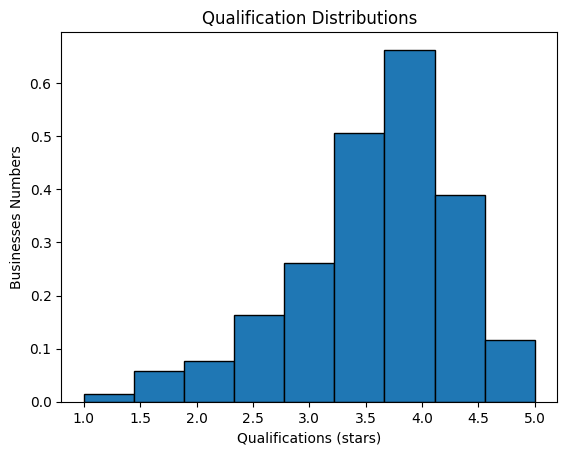

In [16]:
#Create qualifications histogram:
plt.hist(df_limpio_bussines_new["stars"], bins = 9, edgecolor = "black", density=True) 

#Configurate label and title:
plt.xlabel("Qualifications (stars)")
plt.ylabel("Businesses Numbers")
plt.title("Qualification Distributions")

#Print the Histogram:
plt.show()

#### vemos el top 10 de las categorias mas usadas

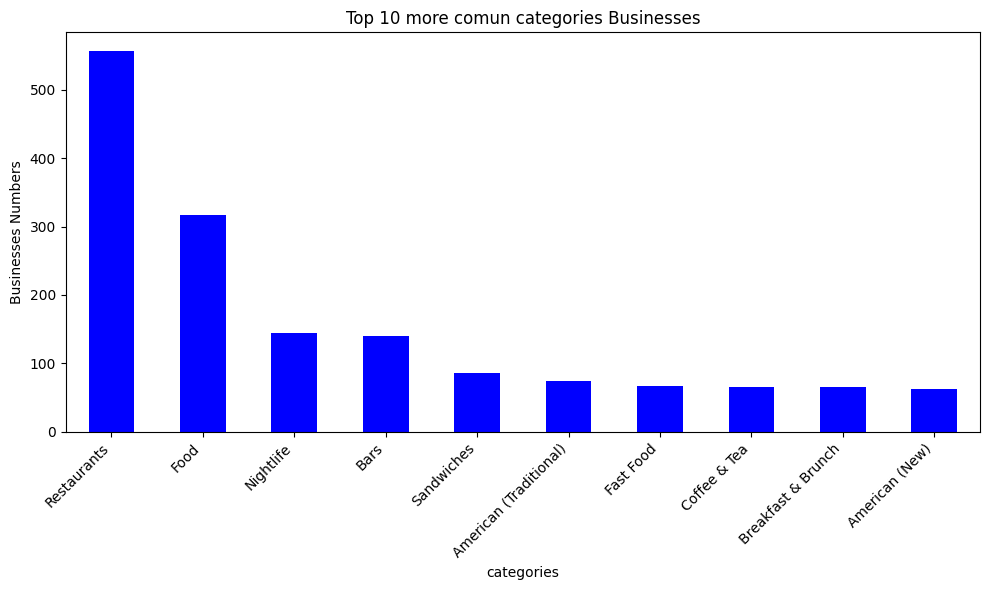

In [17]:
#Get a list of all categories present in the DataFrame:
all_categories = df_limpio_bussines_new["categories"].str.split(", ", expand = True).stack()

#Count the frequency of each category
category_counts = all_categories.value_counts()

#Select the 10 most common categories
top_categories = category_counts.head(10)

#Create a bar chart of the most common categories
plt.figure(figsize=(10, 6))
top_categories.plot(kind="bar", color="blue")
plt.xlabel("categories")
plt.ylabel("Businesses Numbers")
plt.title("Top 10 more comun categories Businesses")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

#### Analizamos outliers

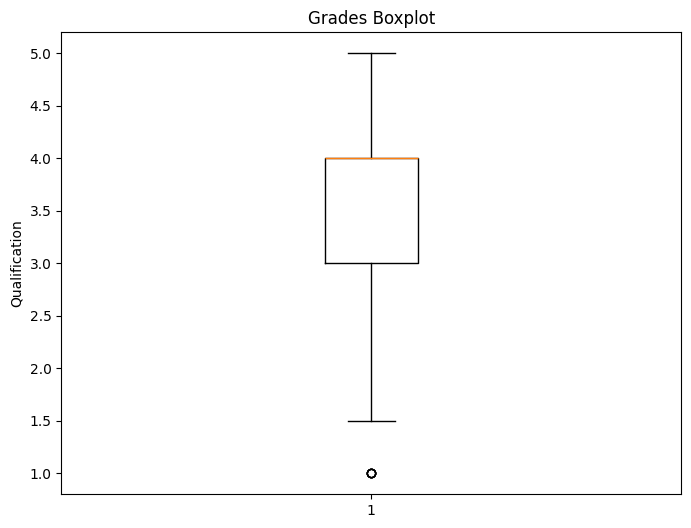

In [18]:
df_limpio_bussines_new

#Calculate the GPA
average_rating = df_limpio_bussines_new['stars'].mean()

#Calculate the standard deviation of grades
std_deviation = df_limpio_bussines_new['stars'].std()

#Identify outliers (for example, more than 2 standard deviations)
outliers = df_limpio_bussines_new[(df_limpio_bussines_new['stars'] > average_rating + 2 * std_deviation) |
                      (df_limpio_bussines_new['stars'] < average_rating - 2 * std_deviation)]

#Visualize outliers in a boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(df_limpio_bussines_new['stars'])
plt.title('Grades Boxplot')
plt.ylabel('Qualification')
plt.show()

In [19]:
#Guardar el DataFrame como un archivo Parquet
ruta_archivo = '../../data/raw/yelp/bussines_processed.parquet'
df_limpio_bussines_new.to_parquet(ruta_archivo,index=False)